<img src="https://i.imgur.com/YX6UATs.png"  width="160">

# Web Scraping - Linkedin

Este notebook é parte das tarefas da Formação Intensiva de Data Science da [Awari](https://awari.com.br/). 

**O objetivo deste projeto é fazer o web scraping de vagas de Cientista de Dados em São Paulo no Linkedin e criar uma nuvem de palavras**.

Foram encontradas 161 vagas. A partir da nuvem de dados, podemos tirar alguns insights. Primeiro, a maior parte das vagas é para trabalho em tempo integral e pede algum tipo de experiência. Segundo, a palvara negócio aparece mais do que requisitos técnicos, como estatítica ou programação. Logo, podemos inferir que conhecimento do negócio é mais importante para as vagas de cientista de dados que conhecimentos técnicos muito específicos.

In [38]:
!pip install selenium
!pip install webdriver-manager
!pip install wordcloud

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from time import sleep
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from os import path

In [23]:
# Abrir a página do LinkedIn com as vagas de cientista de dados
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.linkedin.com/jobs/search?keywords=cientista%20de%20dados&location=S%C3%A3o%20Paulo%2C%20S%C3%A3o%20Paulo%2C%20Brasil&geoId=104746682&trk=homepage-jobseeker_jobs-search-bar_search-submit&position=1&pageNum=0")



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [/Users/leuzinger/.wdm/drivers/chromedriver/mac64/91.0.4472.19/chromedriver] found in cache


In [24]:
# Esperar para a página carregar
driver.implicitly_wait(5)

# Encontrar todas as vagas na página inicial
resultados = driver.find_elements_by_class_name('result-card')

# Pegar as descrições das vagas
lista_descricoes =[]

# loop para navegar pelas páginas com as vagas

while True:
    for r in resultados[len(lista_descricoes):]:
        r.click()
        sleep(5)
        try:
            descricao = driver.find_element_by_class_name('description')
            lista_descricoes.append(descricao.text)
        except:
            print('Erro')
            pass
        
    resultados = driver.find_elements_by_class_name('result-card')
    
    # Critério de saída do loop
    if len(lista_descricoes) == len(resultados): break

In [33]:
len(lista_descricoes)

161

In [25]:
# Concatenar os textos das vagas em um único texto e salvar em um arquivo txt
txt_descricoes = '\n'.join(lista_descricoes)
with open('descricoes_vagas_cientista_de_dados.txt','w') as f:
    f.write(txt_descricoes)

In [26]:
# Encerrar o navegador
driver.quit()

In [27]:
# Criar uma nuvem de palavras com as descricoes das vagas
with open('/Users/leuzinger/Dropbox/Data Science/Awari/descricoes_vagas_cientista_de_dados.txt') as f:
    text = f.read()

In [28]:
# Definindo a lista de stopwords
stopwords= set(STOPWORDS)

# Adicionando a lista stopwords em português
new_words = []
with open("/Users/leuzinger/Dropbox/Data Science/Awari/stopwords.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

new_stopwords = stopwords.union(new_words)

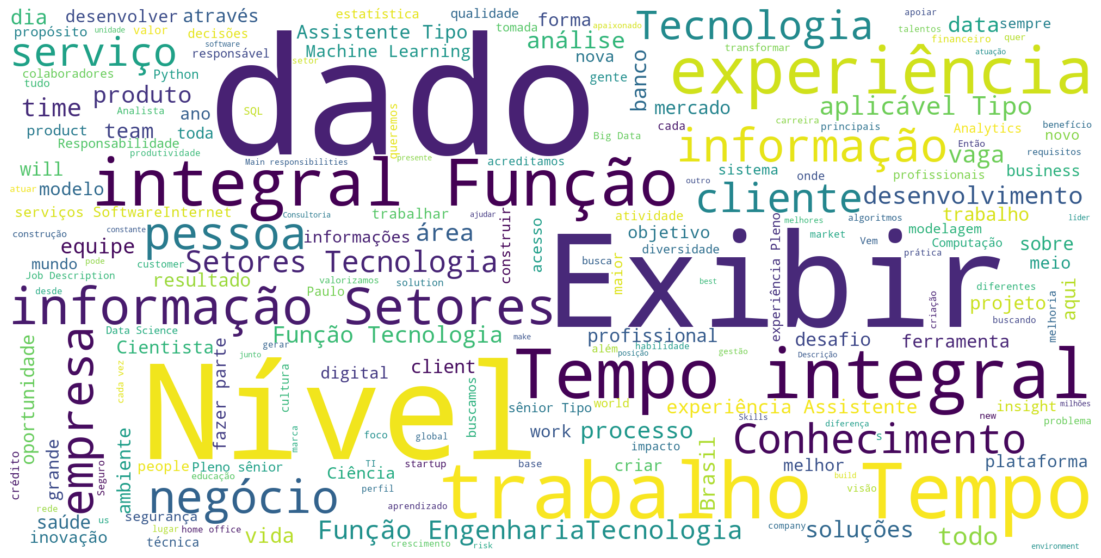

In [34]:
# Criar figura

plt.figure(figsize=(20,10))
wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=new_stopwords,
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()